In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'/Users/antonbaleatolizancos/Projects/lensing_rec_biases')
#sys.path.insert(1,'/Users/antonbaleatolizancos/anaconda/envs/lensing_biases_python3_CIBbranch/lib/python3.8/site-packages/')

import numpy as np
import matplotlib.pyplot as plt
from lensing_rec_biases_code import tools as tls
from lensing_rec_biases_code import qest
from lensing_rec_biases_code import biases


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Initialise experiment object

In [34]:
nlev_t = 18. # uK arcmin
beam_size = 1. #arcmin
lmax = 3000 # Maximum ell for the reconstruction

# Initialise experiments with various different mass cuts
SPT_5e15 = qest.experiment(nlev_t, beam_size, lmax, massCut_Mvir=5e15)
SPT_5e14 = qest.experiment(nlev_t, beam_size, lmax,  massCut_Mvir=5e14)
SPT_1e14 = qest.experiment(nlev_t, beam_size, lmax,  massCut_Mvir=1e14)

One can later inspect the properties by doing

In [35]:
print(SPT_5e15)
print(SPT_5e14)
print(SPT_1e14)

Mass Cut: 5.00e+15  lmax: 3000  Beam FWHM: 1.00 Noise (uK arcmin): 18.00  Freq (GHz): 150.00
Mass Cut: 5.00e+14  lmax: 3000  Beam FWHM: 1.00 Noise (uK arcmin): 18.00  Freq (GHz): 150.00
Mass Cut: 1.00e+14  lmax: 3000  Beam FWHM: 1.00 Noise (uK arcmin): 18.00  Freq (GHz): 150.00


Initialise halo model calculator

In [36]:
# This should roughly match the cosmology in Nick's tSZ papers
cosmoParams = {'As':2.4667392631170437e-09,'ns':.96,'omch2':(0.25-.043)*.7**2,'ombh2':0.044*.7**2,'H0':70.} #Note that for now there is still cosmology dpendence in the cls defined within the experiment class

nZs = 3
nMasses = 3

# Initialise a halo model object for the calculation, using mostly default parameters
hm_calc = biases.hm_framework(cosmoParams=cosmoParams, nZs=nZs, nMasses=nMasses)

Again, we can print out its properties

In [37]:
print(hm_calc)

M_min: 2.00e+13  M_max: 5.00e+16  n_Masses: 3
  z_min: 0.07  z_max: 3.00  n_zs: 3
  Mass function: sheth-torman  Mass definition: vir


# Calculate the biases

Run the main function for each of the mass cuts, and for either the tsz or cib calculation, using the FFTlog approach -- Pass the flag to get the secondary bispectrum bias

In [40]:
hm_calc.get_tsz_bias(SPT_5e15, get_secondary_bispec_bias=True)

Plot the biases

In [41]:
which_bias = 'tsz' # 'tsz' or 'cib'
experiment = SPT_5e15

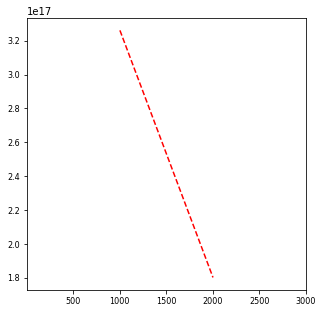

In [50]:
plt.figure(figsize=(5,5))
scaling = experiment.biases['second_bispec_bias_ells']**4 /(2*np.pi)

convention_correction = 1/(2*np.pi) #match FT convetion in QL


plt.plot(experiment.biases['second_bispec_bias_ells'][experiment.biases[which_bias]['second_bispec']['1h']>0],(scaling *convention_correction*experiment.biases[which_bias]['second_bispec']['1h'])[experiment.biases[which_bias]['second_bispec']['1h']>0],color='r',label=r'{}$^2-\kappa$, 1h'.format(which_bias),ls='--')
plt.plot(experiment.biases['second_bispec_bias_ells'][experiment.biases[which_bias]['second_bispec']['1h']<0],-(scaling *convention_correction*experiment.biases[which_bias]['second_bispec']['1h'])[experiment.biases[which_bias]['second_bispec']['1h']<0],color='r',ls='--')


plt.xlim([2,3000])

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig('../plots/tsz_bias_for_diff_mass_cuts/1D_reconstructions/biases_lmax{}_masscut{}.pdf'.format(lmax, '1e14'))


There's now a script in the IoA machine, under Projects/lensing_rec_biases/scripts/testing_secondary_bispectrum_bias.py, that lets you compute all the cells in this notebook